In [1]:
import numpy as np
import pandas as pd # use for data manipulation and analysis
import matplotlib.pyplot as mp
from sklearn.model_selection import train_test_split # provides a wind range of tools and algoritham for various machine tasks like classification, regression
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.neural_network import MLPClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score


In [2]:
df = pd.read_csv('mail_data.csv')

In [3]:
print(df)

     Category                                            Message
0         ham  Go until jurong point, crazy.. Available only ...
1         ham                      Ok lar... Joking wif u oni...
2        spam  Free entry in 2 a wkly comp to win FA Cup fina...
3         ham  U dun say so early hor... U c already then say...
4         ham  Nah I don't think he goes to usf, he lives aro...
...       ...                                                ...
5567     spam  This is the 2nd time we have tried 2 contact u...
5568      ham               Will ü b going to esplanade fr home?
5569      ham  Pity, * was in mood for that. So...any other s...
5570      ham  The guy did some bitching but I acted like i'd...
5571      ham                         Rofl. Its true to its name

[5572 rows x 2 columns]


In [4]:
data = df.where((pd.notnull(df)), '') #convert into notnull

In [5]:
data.head() # print top 5 lines 

,Category,Message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [6]:
data.tail() # print last 5 lines 

,Category,Message
5567,spam,This is the 2nd time we have tried 2 contact u...
5568,ham,Will ü b going to esplanade fr home?
5569,ham,"Pity, * was in mood for that. So...any other s..."
5570,ham,The guy did some bitching but I acted like i'd...
5571,ham,Rofl. Its true to its name


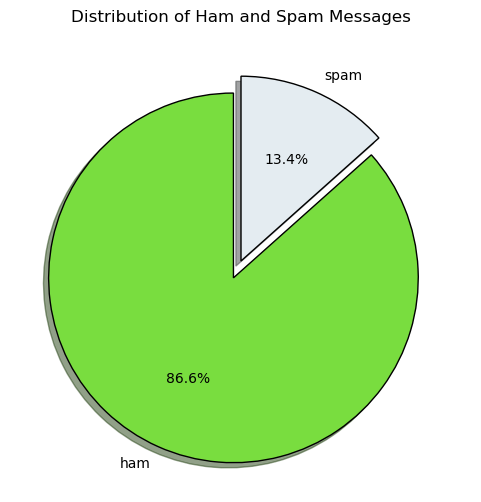

In [7]:
counts = df["Category"].value_counts()

colours = ['#79DD3F', '#e4ecf1']  # Light blue and light red as an example
explode=[0.1,0]
# Create pie chart
mp.figure(figsize=(6, 6))
mp.pie(counts,
       labels=counts.index,
       autopct="%1.1f%%",
       startangle=90,
       colors=colours,
       shadow=True,
       explode=explode,
       wedgeprops={'edgecolor': 'black', 'linewidth': 1}  # <- Edge color and width# <- add this line
      )
mp.title("Distribution of Ham and Spam Messages")
mp.show()

In [8]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [9]:
data.shape


(5572, 2)

In [10]:
data.loc[data['Category'] == 'spam', 'Category',] = 0 # 0 show's spam
data.loc[data['Category'] == 'ham', 'Category',] = 1 # 1 show's ham

In [11]:
x = data['Message']

y = data['Category']

In [12]:
print(x)

0       Go until jurong point, crazy.. Available only ...
1                           Ok lar... Joking wif u oni...
2       Free entry in 2 a wkly comp to win FA Cup fina...
3       U dun say so early hor... U c already then say...
4       Nah I don't think he goes to usf, he lives aro...
                              ...                        
5567    This is the 2nd time we have tried 2 contact u...
5568                 Will ü b going to esplanade fr home?
5569    Pity, * was in mood for that. So...any other s...
5570    The guy did some bitching but I acted like i'd...
5571                           Rofl. Its true to its name
Name: Message, Length: 5572, dtype: object


In [13]:
print(y)

0       1
1       1
2       0
3       1
4       1
       ..
5567    0
5568    1
5569    1
5570    1
5571    1
Name: Category, Length: 5572, dtype: object


In [14]:
# split this data set into testing and training

In [16]:
x_train,x_test, y_train, y_test = train_test_split(x,y, test_size=0.2, random_state=3)

In [17]:
print(x.shape) # total email
print(x_train.shape) # 80% training
print(x_test.shape) # 20% testing

(5572,)
(4457,)
(1115,)


In [18]:
print(y.shape) # total email
print(y_train.shape) # 80% training
print(y_test.shape) # 20% testing

(5572,)
(4457,)
(1115,)


In [19]:
feature_extraction = TfidfVectorizer(min_df = 1, stop_words = 'english', lowercase=True)

x_train_features = feature_extraction.fit_transform(x_train) #fit only on training data
x_test_features = feature_extraction.transform(x_test) #transform test data

y_train = y_train.astype('int')
y_test = y_test.astype('int')

In [20]:
print(x_train)

3075                  Don know. I did't msg him recently.
1787    Do you know why god created gap between your f...
1614                         Thnx dude. u guys out 2nite?
4304                                      Yup i'm free...
3266    44 7732584351, Do you want a New Nokia 3510i c...
                              ...                        
789     5 Free Top Polyphonic Tones call 087018728737,...
968     What do u want when i come back?.a beautiful n...
1667    Guess who spent all last night phasing in and ...
3321    Eh sorry leh... I din c ur msg. Not sad alread...
1688    Free Top ringtone -sub to weekly ringtone-get ...
Name: Message, Length: 4457, dtype: object


In [21]:
print(x_train_features)

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 34775 stored elements and shape (4457, 7431)>
  Coords	Values
  (0, 2329)	0.38783870336935383
  (0, 3811)	0.34780165336891333
  (0, 2224)	0.413103377943378
  (0, 4456)	0.4168658090846482
  (0, 5413)	0.6198254967574347
  (1, 3811)	0.17419952275504033
  (1, 3046)	0.2503712792613518
  (1, 1991)	0.33036995955537024
  (1, 2956)	0.33036995955537024
  (1, 2758)	0.3226407885943799
  (1, 1839)	0.2784903590561455
  (1, 918)	0.22871581159877646
  (1, 2746)	0.3398297002864083
  (1, 2957)	0.3398297002864083
  (1, 3325)	0.31610586766078863
  (1, 3185)	0.29694482957694585
  (1, 4080)	0.18880584110891163
  (2, 6601)	0.6056811524587518
  (2, 2404)	0.45287711070606745
  (2, 3156)	0.4107239318312698
  (2, 407)	0.509272536051008
  (3, 7414)	0.8100020912469564
  (3, 2870)	0.5864269879324768
  (4, 2870)	0.41872147309323743
  (4, 487)	0.2899118421746198
  :	:
  (4454, 2855)	0.47210665083641806
  (4454, 2246)	0.47210665083641806
  (4455, 4456)	0.24

In [22]:
model = LogisticRegression()

In [23]:
model.fit(x_train_features, y_train)

LogisticRegression()

In [24]:
prediction_on_training_data = model.predict(x_train_features)
accuracy_on_training_data = accuracy_score(y_train, prediction_on_training_data)

In [25]:
print('Accurace on training data :', accuracy_on_training_data)

Accurace on training data : 0.9676912721561588


In [26]:
prediction_on_test_data = model.predict(x_test_features)
accuracy_on_test_data = accuracy_score(y_test, prediction_on_test_data)

In [27]:
print('Accurace on test data :', accuracy_on_test_data)

Accurace on test data : 0.9668161434977578


In [28]:
# neural network

In [ ]:

# Load dataset
df = pd.read_csv("mail_data.csv", encoding="latin-1")

# Keep only needed columns (adjust based on actual CSV)
df = df[['Category', 'Message']]

# Drop missing values
df = df.dropna()

# Encode labels manually (ham=1, spam=0)
df['Category'] = df['Category'].map({'ham': 1, 'spam': 0})

# Features (X) and Target (y)
X = df['Message']
y = df['Category']

# Convert text into numerical features
vectorizer = TfidfVectorizer(stop_words='english')
X = vectorizer.fit_transform(X)

# Train-Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

# Define MLP (Neural Network)
mlp = MLPClassifier(hidden_layer_sizes=(128, 64),
                    activation='relu',# jo postive value aasel tyla to same tevto (5) = 5
                    solver='adam', #jo negative value aasel tyla to positive karto (-5) =  0
                    max_iter=200,
                    random_state=42)

# Train the model
mlp.fit(X_train, y_train)

# Predict
y_pred = mlp.predict(X_test)

# Accuracy
accuracy = accuracy_score(y_test, y_pred)
print("MLP Neural Network Accuracy:", accuracy)


In [68]:
new_mail = ["Win $5000 now!!! Click this link fast!!!"]

# Transform input mail
X_new = vectorizer.transform(new_mail)

# Predict using the trained model
pred = mlp.predict(X_new)[0]   # pred will be 0 or 1

# Check result
if pred == 1:
    print("Ham mail")
else:
    print("Spam mail")

print(pred)


Spam mail
0
